# Import Dependencies

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

# Read the CSV and Perform Basic Data Cleaning

In [57]:
data_to_load = "new_folder/googleplaystore.csv"
df_apps = pd.read_csv(data_to_load)

In [58]:
categories = list(df_apps["Category"].unique())
#Remove Category 1.9
categories.remove('1.9')

a = df_apps.loc[df_apps["Category"] == "1.9"]
df_apps = df_apps.drop(int(a.index.values),axis=0)

In [59]:
df_apps = df_apps.drop(df_apps[df_apps['Rating'].isnull()].index, axis=0)

In [60]:
df_apps["Type"] = (df_apps["Type"] == "Paid").astype(int)

# Select your features (columns)

In [61]:
#Extract App, Installs, & Content Rating from df_apps
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)

In [62]:
popAppsCopy = popApps.drop(["App","Last Updated","Current Ver","Android Ver","Type"],axis=1)

In [97]:
data = popAppsCopy
data = data.drop("Genres",axis =1)
data_binary_encoded = pd.get_dummies(data, columns=["Category"])
data_binary_encoded_1 = pd.get_dummies(data_binary_encoded, columns=["Content Rating"])

In [101]:
X = data_binary_encoded_1.drop("Installs", axis = 1)
y = data_binary_encoded_1["Installs"]
y = y.replace({1:'1000+',5: '1000+', 10: '1000+',50:'1000+',100:'1000+',500:'1000+',
               1000: '1000+',5000:'10000+',10000: '10000+', 50000:'100000+',100000:'100000+',
               500000:'1000000+', 1000000:'1000000+',5000000:'10000000+',10000000:'10000000+',
               50000000:'100000000+',100000000:'100000000+', 500000000:'1000000000+', 
               1000000000:'1000000000+' })
print(X.shape, y.shape)

(8892, 43) (8892,)


In [65]:
feature_names = X.columns

# Split the data into training and testing

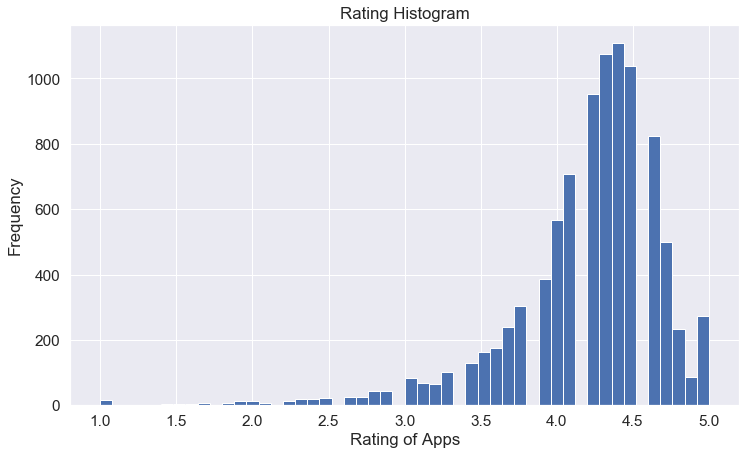

In [66]:
plt.figure(figsize=(12,7))
df_apps['Rating'].hist(bins=50)
plt.title("Rating Histogram")
plt.xlabel('Rating of Apps')
plt.ylabel('Frequency')
plt.savefig("Rating_hist.png")

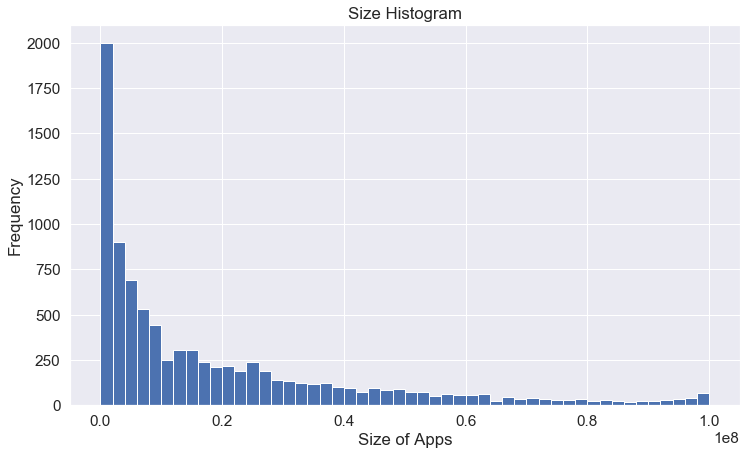

In [67]:
plt.figure(figsize=(12,7))
popApps['Size'].hist(bins=50)
plt.title("Size Histogram")
plt.xlabel('Size of Apps')
plt.ylabel('Frequency')
plt.savefig('size_hist.png')

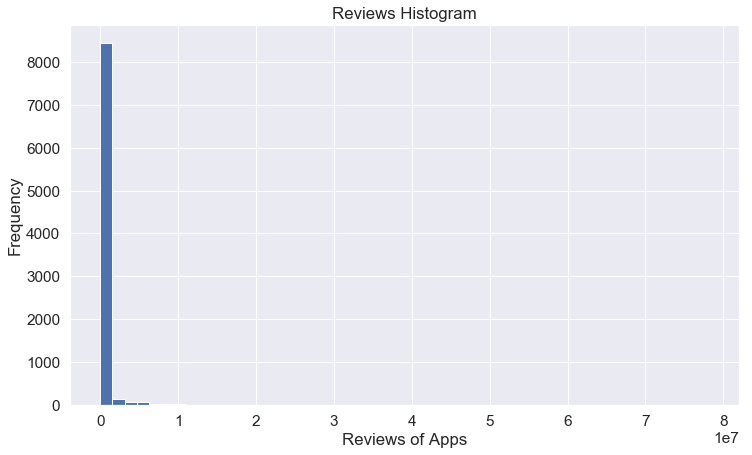

In [68]:
plt.figure(figsize=(12,7))
popApps['Reviews'].hist(bins=50)
plt.title("Reviews Histogram")
plt.xlabel('Reviews of Apps')
plt.ylabel('Frequency')
plt.savefig('review_hist.png')

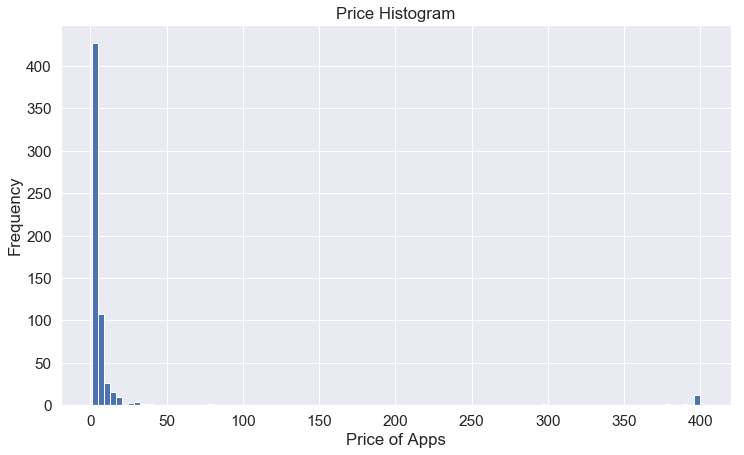

In [69]:
plt.figure(figsize=(12,7))
popApps[popApps['Price'] > 0.]['Price'].hist(bins=100)
plt.title("Price Histogram")
plt.xlabel('Price of Apps')
plt.ylabel('Frequency')
plt.savefig('price_hist.png')

# Split the data into training and testing

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#  Fit (train) or model using the training data

In [18]:
classifier.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.284150547308442
Testing Data Score: 0.29329734592892487


# Standard

In [71]:
classifier.fit(X_train_scaled, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.3925626030889189
Testing Data Score: 0.39361223571749887


# Random Forest Model

In [73]:
from sklearn import tree

In [74]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.725596041385515

In [24]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=y,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')

graph = graphviz.Source(dot_data)
plt.savefig('graph.png')
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.324108 to fit



<Figure size 432x288 with 0 Axes>

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7800269905533064

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.7858749437696806

# K Nearest Neighbors Model

In [27]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.641
k: 3, Train/Test Score: 0.804/0.619
k: 5, Train/Test Score: 0.744/0.609
k: 7, Train/Test Score: 0.704/0.588
k: 9, Train/Test Score: 0.666/0.564
k: 11, Train/Test Score: 0.637/0.541
k: 13, Train/Test Score: 0.607/0.519
k: 15, Train/Test Score: 0.586/0.507
k: 17, Train/Test Score: 0.570/0.501
k: 19, Train/Test Score: 0.559/0.496


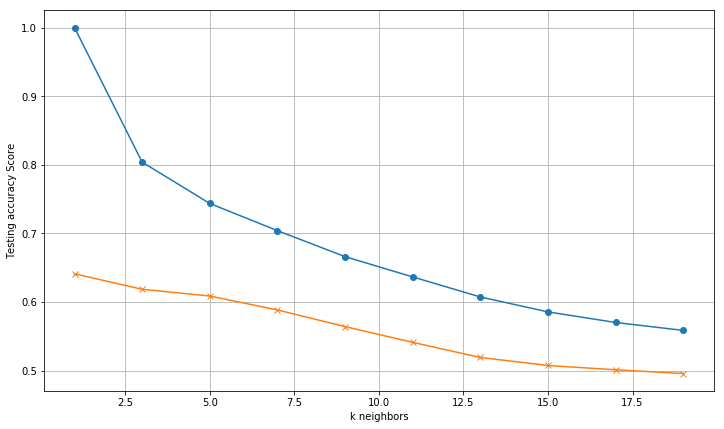

In [28]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.figure(figsize=(12,7))   
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.grid()
plt.savefig("KNN.png")
plt.show()

In [29]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Test Acc: 0.541


# XGBoost Model

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [78]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [79]:
# make predictions for test data
y_pred = model.predict(X_test)

In [80]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.18%


In [81]:
model.score(X_test,y_test)

0.7818263607737292

In [82]:
model.score(X_train,y_train)

0.7918728445044234

# XGBoost Model with Cross Validation

In [83]:
from sklearn.model_selection import RepeatedKFold

random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[   4    5    6 ... 8889 8890 8891] [   0    1    2 ... 8883 8884 8886]
[   0    1    2 ... 8883 8884 8886] [   4    5    6 ... 8889 8890 8891]
[   1    5    6 ... 8884 8887 8889] [   0    2    3 ... 8888 8890 8891]
[   0    2    3 ... 8888 8890 8891] [   1    5    6 ... 8884 8887 8889]


In [84]:
X_k_f = np.array(X)
y_k_f = np.array(y)

In [85]:
X_train_f, X_test_f, y_train_f, y_test_f = X_k_f[train], X_k_f[test], y_k_f[train], y_k_f[test]

In [86]:
model_1 = XGBClassifier()
model_1.fit(X_train_f, y_train_f)

# make predictions for test data
y_pred = model_1.predict(X_test_f)

In [87]:
# evaluate predictions
accuracy = accuracy_score(y_test_f, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.77%


In [88]:
model_1.score(X_train_f,y_train_f)

0.8027440395861448

# Random permutations cross-validation a.k.a. Shuffle & Split

In [90]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[ 291 4269 3539 ... 4859 3264 2732] [3063 3281 1112 ... 5688 1460 7449]
[5532 8150 4992 ...  494 7154 7835] [3161 5033 5069 ... 3624    4 7870]
[8828 6492 8402 ... 7606 5611 2966] [ 260 3515 8364 ... 5112 6363 7392]
[ 467 7006 5161 ... 8622 3917  317] [7758 4902 8304 ... 8840 3016 1133]
[3163 1029 2441 ... 5561 5192 8406] [8448 3014 3125 ... 6423 3314 3787]


In [91]:
X_k_ss = np.array(X)
y_k_ss = np.array(y)

X_train_ss, X_test_ss, y_train_ss, y_test_ss = X_k_ss[train_index], X_k_ss[test_index], y_k_ss[train_index], y_k_ss[test_index]

In [92]:
model_2 = XGBClassifier()
model_2.fit(X_train_ss, y_train_ss)

# make predictions for test data
y_pred_2 = model_2.predict(X_test_ss)

In [93]:
# evaluate predictions
accuracy = accuracy_score(y_test_ss, y_pred_2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.04%


In [96]:
model_2.score(X_test_ss,y_test_ss)

0.7903733693207378

Accuracy 0.7903733693207378


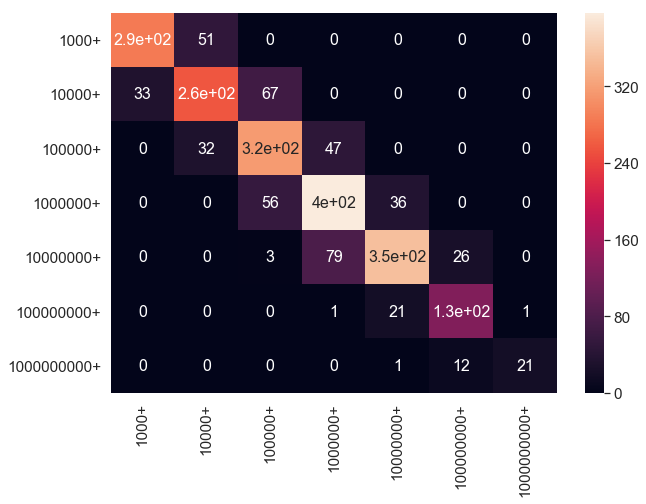

In [103]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

labels = np.unique(y_test_ss)
cm = confusion_matrix(y_test_ss, y_pred_2, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print('Accuracy' , accuracy_score(y_test_ss, y_pred_2))
plt.savefig("correlation_xgb.png")

# Naive Bayes classifier

In [47]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 


0.5348627980206928
